In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import json

# Load data in

In [2]:
name = "sum"

with open(f'{name}.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and add milliseconds
df = pd.DataFrame(data)

df["durationMs"] = df["durationNs"] / 1_000_000
df["messageSizeKB"] = df["sizeInBytes"] / 1024  # Convert bytes to KB

# Plot seperately

C:\Users\stand\AppData\Local\Temp\ipykernel_10824\2092013238.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby('encryptionType').apply(


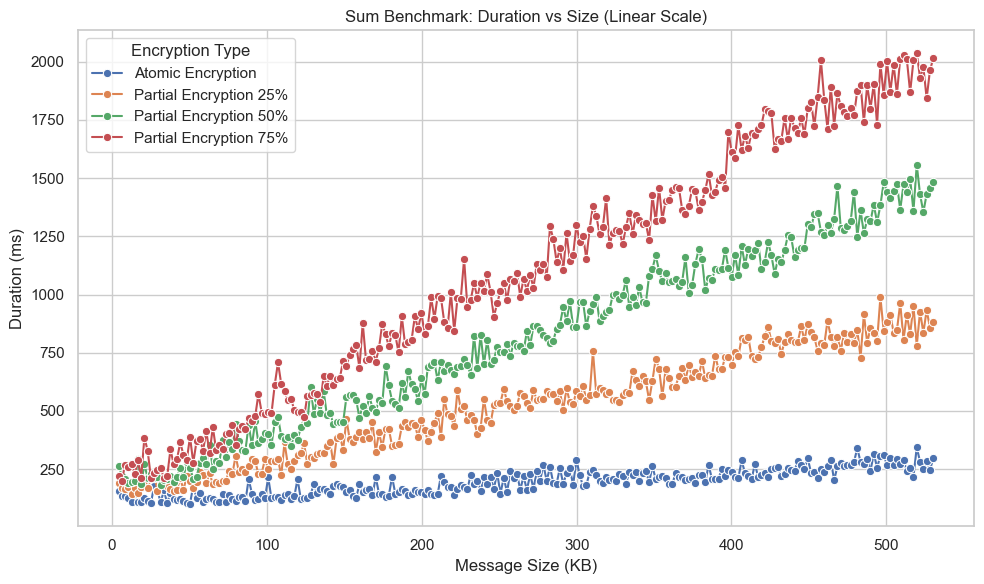

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


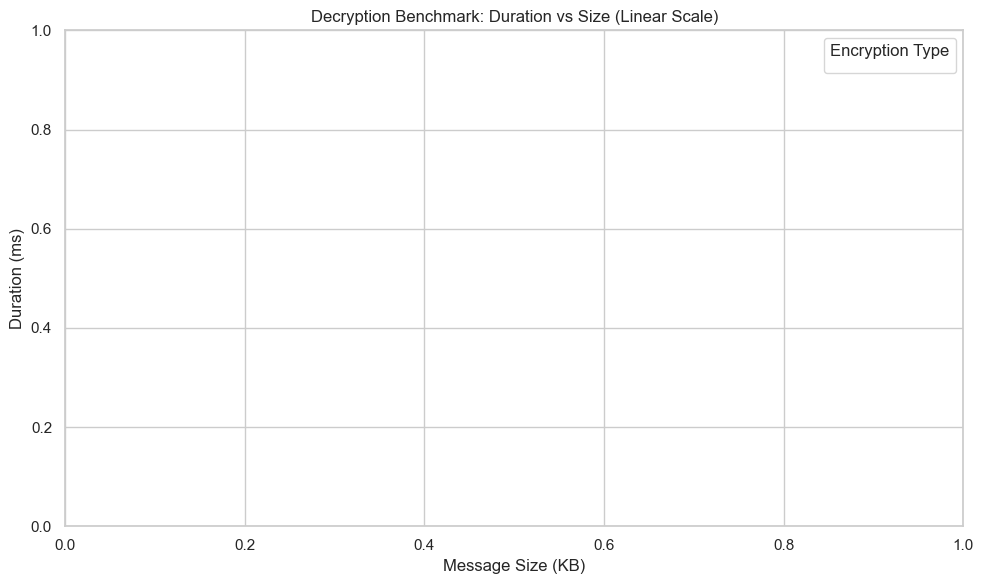

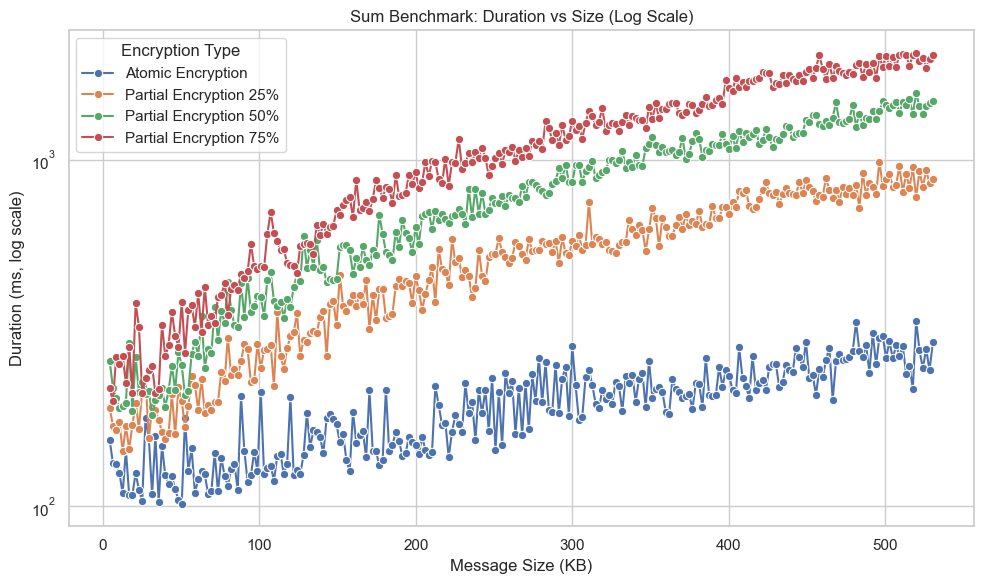

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


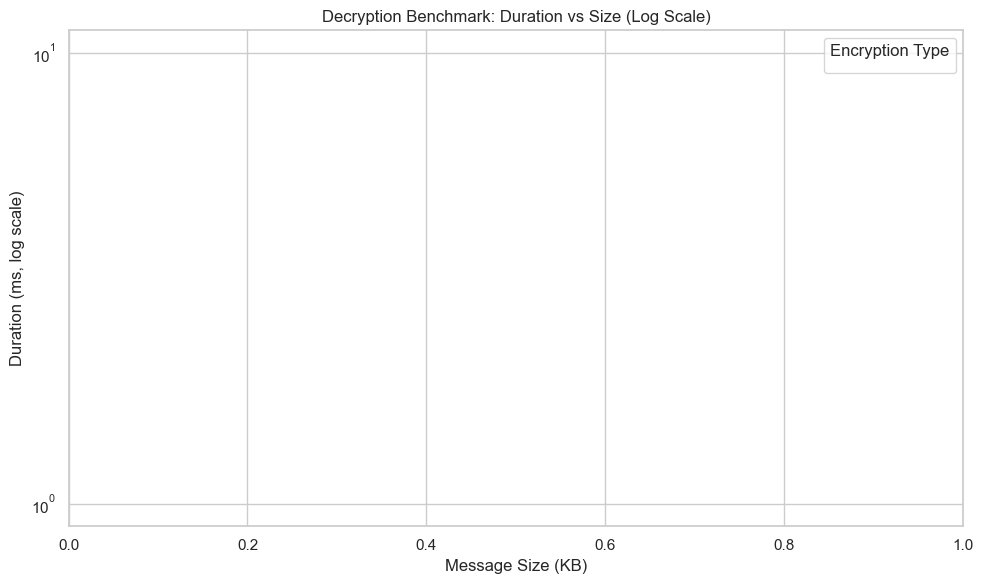

In [3]:
# Set seaborn style
sns.set(style="whitegrid")

df_filtered = df.groupby('encryptionType').apply(
    lambda group: group[group['messageSizeKB'] != group['messageSizeKB'].min()]
).reset_index(drop=True)

# -------- Encryption Linear Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Encryption")],  # Use filtered data
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o"
)
plt.title("Sum Benchmark: Duration vs Size (Linear Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Duration (ms)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig(f"{name}_encrypt_lin.png")
plt.show()

# -------- Decryption Linear Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Decryption")],  # Use filtered data
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o"
)
plt.title("Decryption Benchmark: Duration vs Size (Linear Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Duration (ms)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig(f"{name}_decrypt_lin.png")
plt.show()

# -------- Encryption Logarithmic Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Encryption")],  # Use filtered data
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o"
)
plt.yscale("log")
plt.title("Sum Benchmark: Duration vs Size (Log Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Duration (ms, log scale)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig(f"{name}_encrypt_log.png")
plt.show()

# -------- Decryption Logarithmic Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Decryption")],  # Use filtered data
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o"
)
plt.yscale("log")
plt.title("Decryption Benchmark: Duration vs Size (Log Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Duration (ms, log scale)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig(f"{name}_decrypt_log.png")
plt.show()

# Plot together

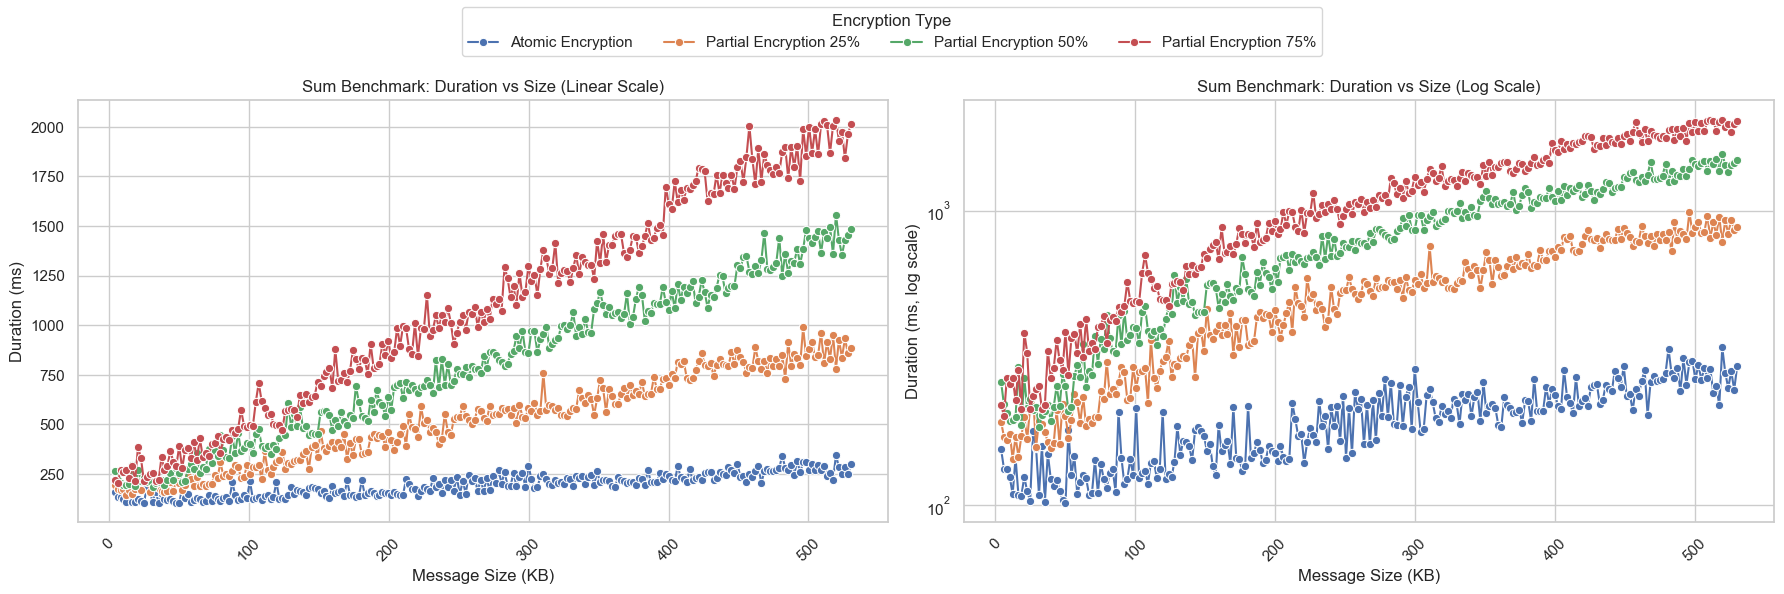

ValueError: number sections must be larger than 0.

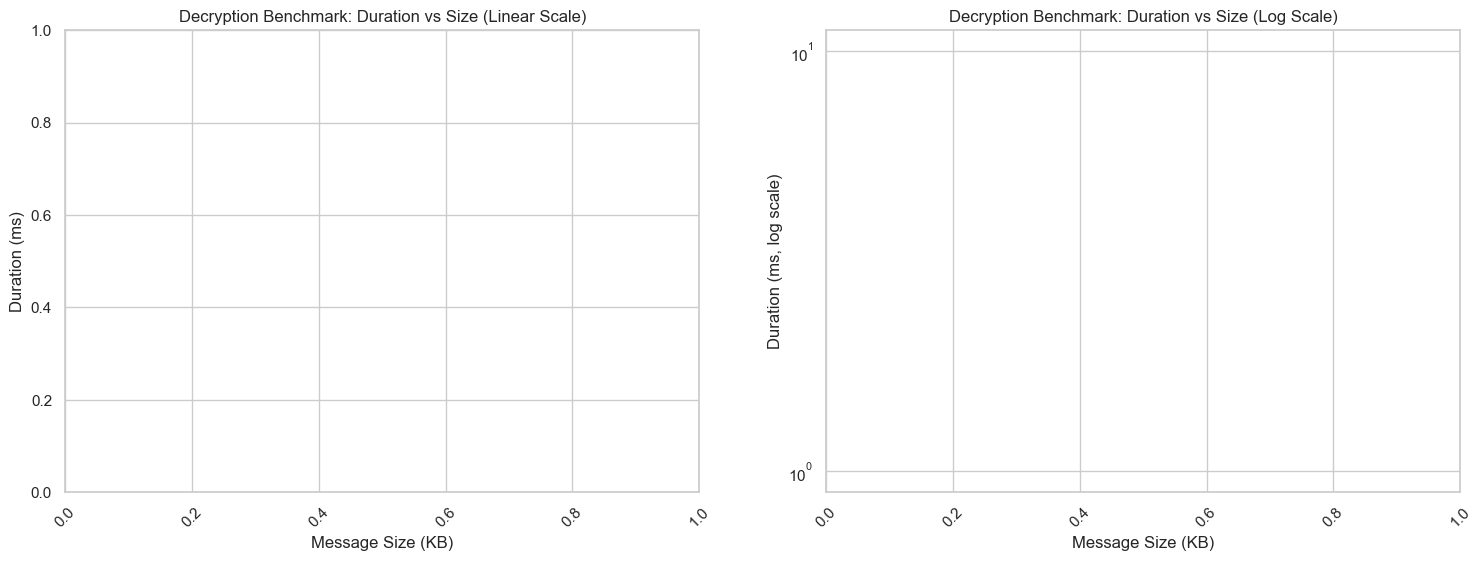

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create two subplots (1 row, 2 columns)

# Linear scale plot on the first subplot
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Encryption")],  # Filter for encryption by checking the name
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o",
    ax=axes[0],
    legend=False  # Disable legend for this plot
)
axes[0].set_title("Sum Benchmark: Duration vs Size (Linear Scale)")
axes[0].set_xlabel("Message Size (KB)")
axes[0].set_ylabel("Duration (ms)")
axes[0].tick_params(axis="x", rotation=45)

# Logarithmic scale plot on the second subplot
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Encryption")],  # Filter for encryption by checking the name
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o",
    ax=axes[1]
)
axes[1].set_yscale("log")
axes[1].set_title("Sum Benchmark: Duration vs Size (Log Scale)")
axes[1].set_xlabel("Message Size (KB)")
axes[1].set_ylabel("Duration (ms, log scale)")
axes[1].tick_params(axis="x", rotation=45)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Encryption Type", loc="upper center", ncol=len(labels))

axes[1].get_legend().remove()

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.savefig(f"{name}_encrypt_comb.png")
plt.show()

# -------- Decryption Combined Linear and Log Scale Plot --------
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create two subplots (1 row, 2 columns)

# Linear scale plot on the first subplot
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Decryption")],  # Filter for decryption by checking the name
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o",
    ax=axes[0],
    legend=False  # Disable legend for this plot
)
axes[0].set_title("Decryption Benchmark: Duration vs Size (Linear Scale)")
axes[0].set_xlabel("Message Size (KB)")
axes[0].set_ylabel("Duration (ms)")
axes[0].tick_params(axis="x", rotation=45)

# Logarithmic scale plot on the second subplot
sns.lineplot(
    data=df_filtered[df_filtered["encryptionType"].str.contains("Decryption")],  # Filter for decryption by checking the name
    x="messageSizeKB",
    y="durationMs",
    hue="encryptionType",
    marker="o",
    ax=axes[1]
)
axes[1].set_yscale("log")
axes[1].set_title("Decryption Benchmark: Duration vs Size (Log Scale)")
axes[1].set_xlabel("Message Size (KB)")
axes[1].set_ylabel("Duration (ms, log scale)")
axes[1].tick_params(axis="x", rotation=45)


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Encryption Type", loc="upper center", ncol=len(labels))

axes[1].get_legend().remove()

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.savefig(f"{name}_decrypt_comb.png")
plt.show()